# MUSHROOM EDIBILITY IDENTIFICATION

# Data description

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In the dataset we have two type of class of mushrooms i.e, p(poisonous) and e(edible).The task is to determine whether a mushroom specie is edible or poisonous. 

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
#Checking the dimension of data
df.shape

(8124, 23)

In [5]:
#Checking columns name
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

We have 8124 rows and 23 columns (including the target column).

In [6]:
#Lets check the data type of the cloumns
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the data is of object type.

In [7]:
#Lets check the amount of speices which are edible and which are piosonus
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

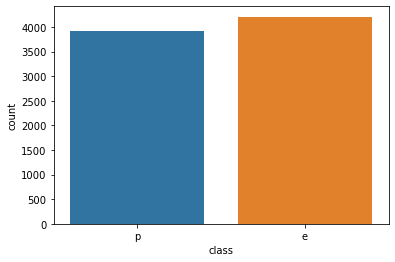

In [8]:
sns.countplot(df['class'])

There are 4208- edible and 3916 are piosonous.

In [9]:
#Lets check distribution of data in each column
for i in df.columns:
    print('Unique feature counts:',df[i].value_counts() )

Unique feature counts: e    4208
p    3916
Name: class, dtype: int64
Unique feature counts: x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
Unique feature counts: y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
Unique feature counts: n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
Unique feature counts: f    4748
t    3376
Name: bruises, dtype: int64
Unique feature counts: n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
Unique feature counts: f    7914
a     210
Name: gill-attachment, dtype: int64
Unique feature counts: c    6812
w    1312
Name: gill-spacing, dtype: int64
Unique feature counts: b    5612
n    2512
Name: gill-size, dtype: int64
Unique feature counts: b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64


In [10]:
#Checking null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

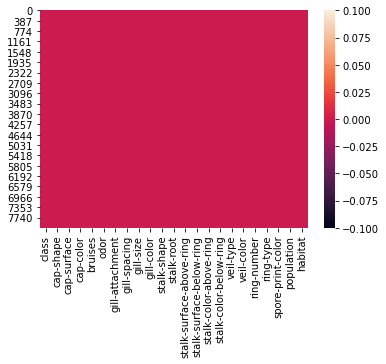

In [11]:
sns.heatmap(df.isnull())

There are no null values in the dataset but we have observed that in the 'stalk-root' column there are 2480 values marked as '?', it means that these values are unknown.

In [12]:
#Lets replace '?' with the median of the column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
df['stalk-root']=imp.fit_transform(df['stalk-root'].values.reshape(-1,1))

In [13]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


As all the values are of categorical, lets convert them to numerical using Label Encoder so that we can implement different techniques and algorithms on it.

In [15]:
le=LabelEncoder()
df_new=pd.DataFrame(columns=df.columns)
for i in df.columns:
    df_new[i]=le.fit_transform(df[i])
    

In [16]:
df_new.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1


Here in class column 1 denotes poisonous and 0 is for edible.

In [17]:
df=df_new

In [18]:
#Statistical Summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,0.415066,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,0.812647,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,0.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


There is no huge difference in range of the columns.
The column 'veil-type' have mean and standar deviation zero it means that there is no spread at all in data of this column.

# Checking Correlation

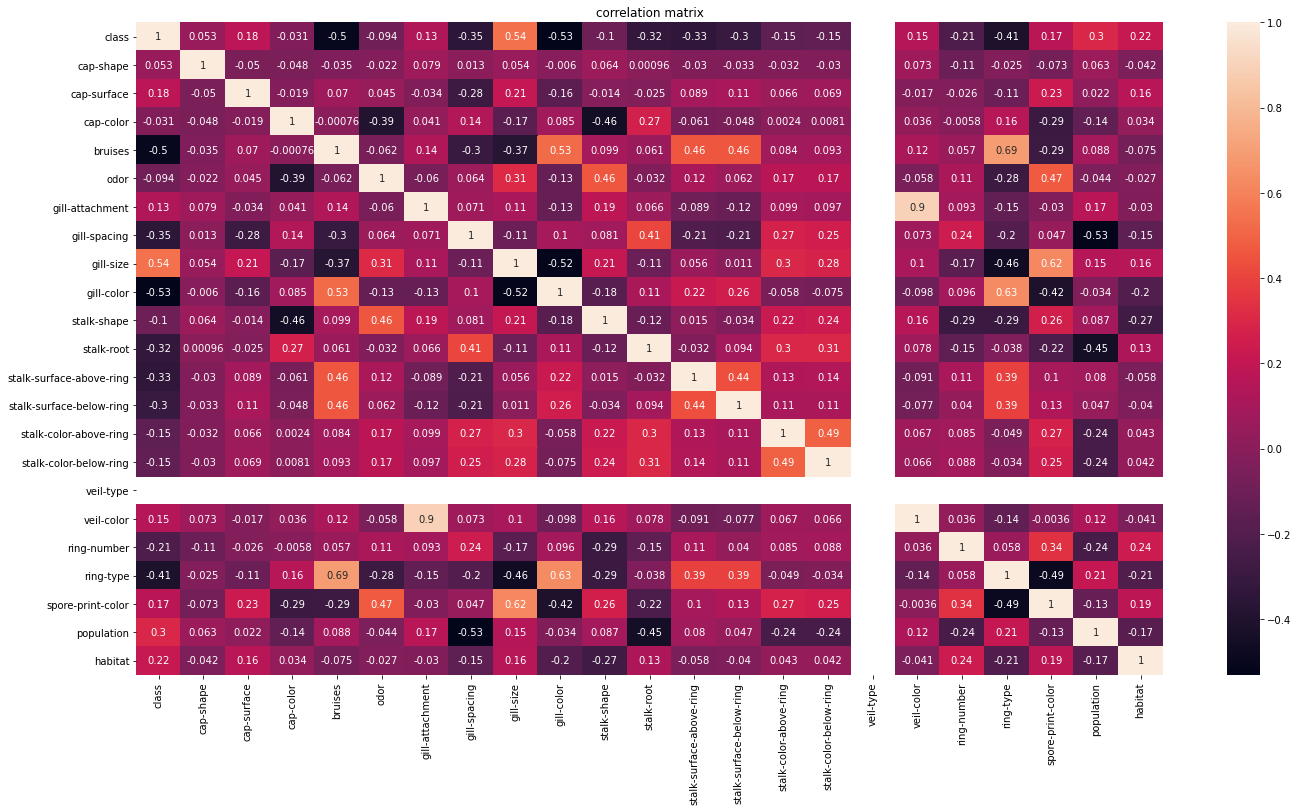

In [19]:
corr=df.corr()
plt.figure(figsize=(23,12))
sns.heatmap(corr,annot=True)
plt.title('correlation matrix')
plt.show()

Let's arrange correaltion values in descending order.

In [20]:
corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-root                 -0.324194
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

It is found that veil-type has no relation with the target variable, so we should remove this column.


In [21]:
df.drop(columns=['veil-type'],inplace=True)

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1


In [23]:
df.shape

(8124, 22)

In [139]:
#Checking for outliers

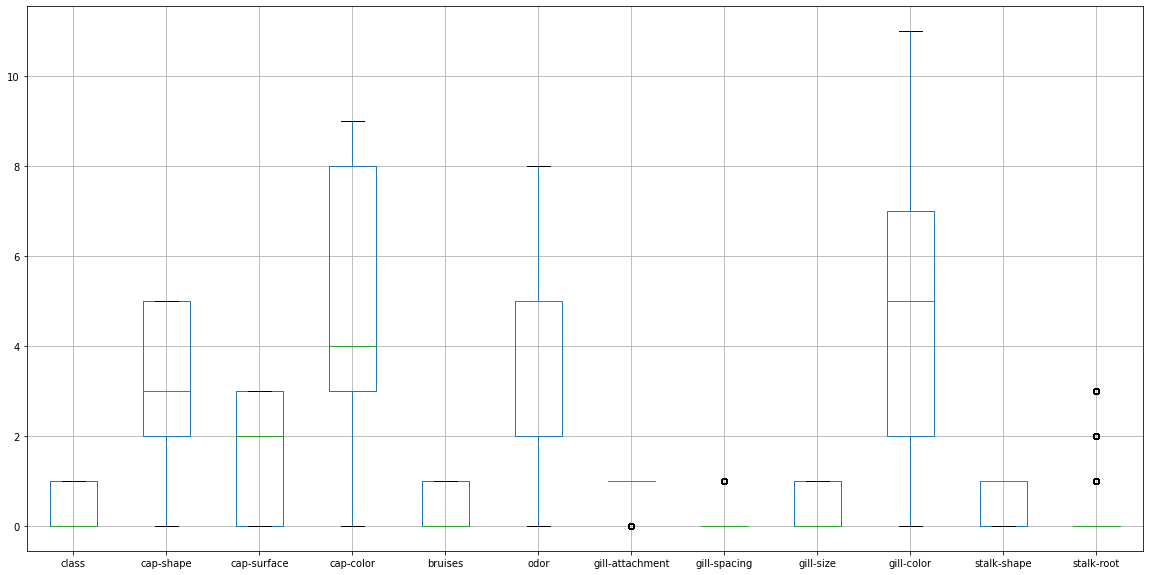

In [24]:
df.iloc[:,:12].boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.25)
plt.show()

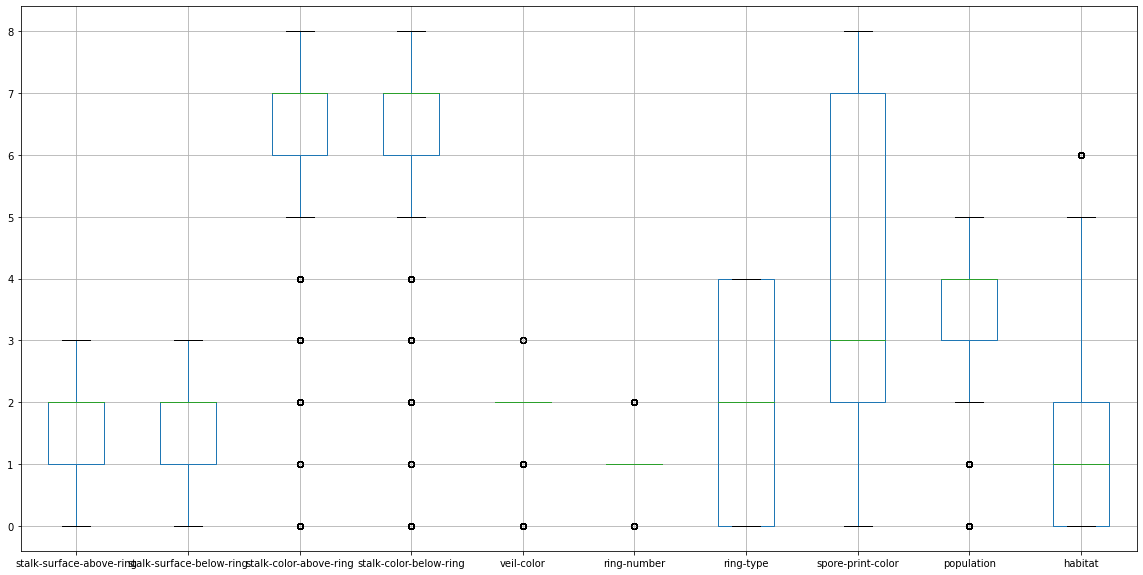

In [25]:
df.iloc[:,12:].boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are some outliers in few columns, lets check them using z score.

In [82]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([  33,   41,   48, ..., 8121, 8123, 8123], dtype=int64), array([11, 11, 11, ..., 16,  6, 16], dtype=int64))


In [83]:
print('shape before removing the outliers:' , df.shape)

df_new=df[(zscr<3).all(axis=1)]

print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (8124, 22)
shape after removing outliers : (6376, 22)


As the data loss is huge after removing the ouliers, therefore its better to keep them

# Checking Skewness

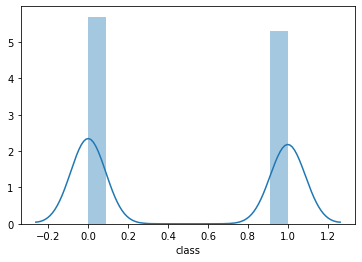

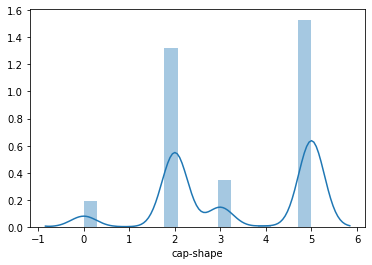

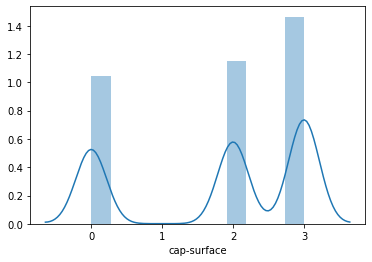

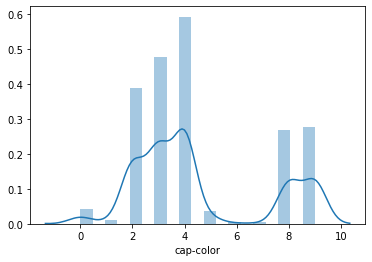

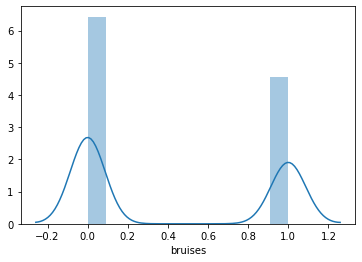

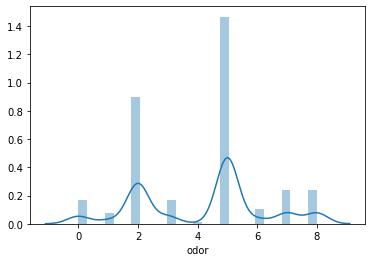

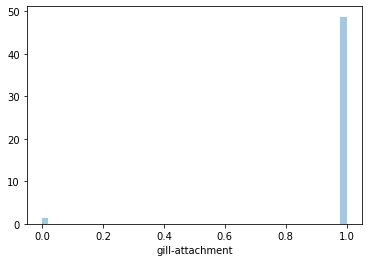

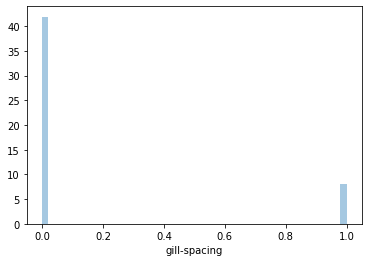

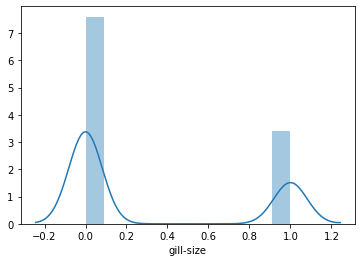

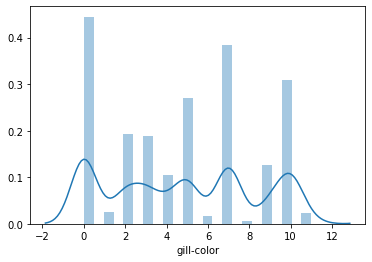

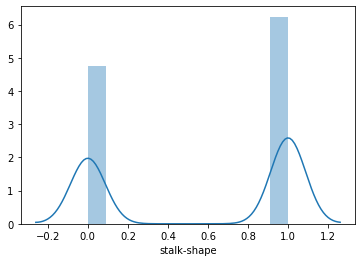

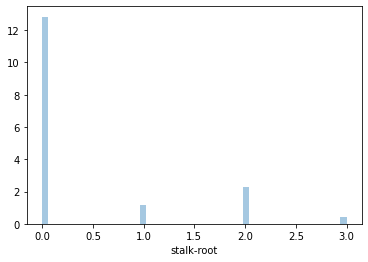

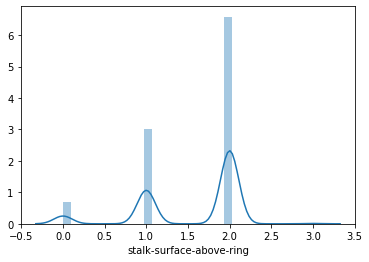

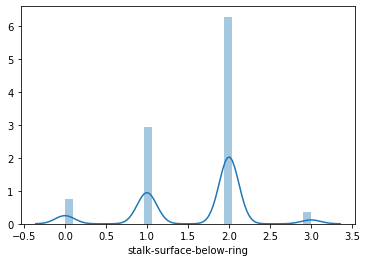

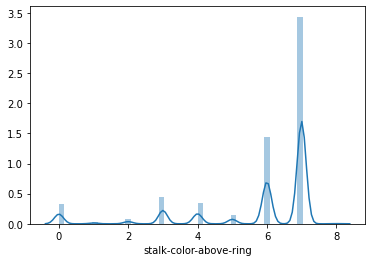

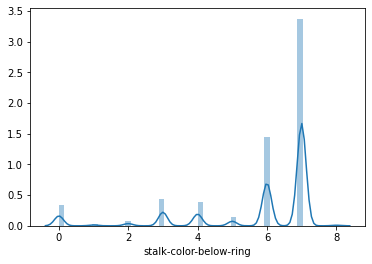

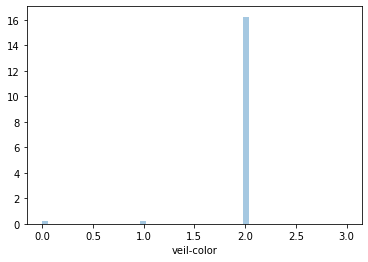

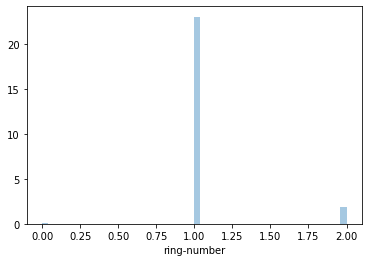

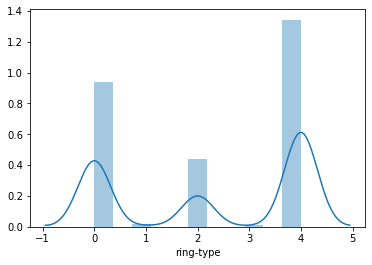

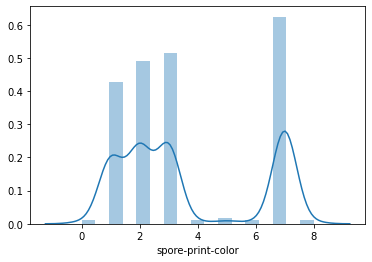

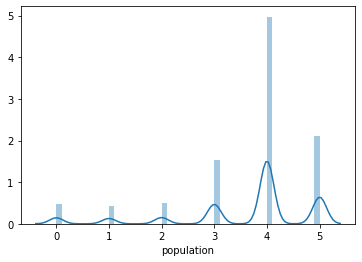

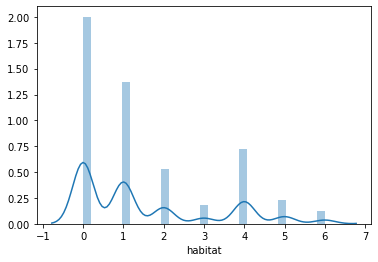

In [28]:
#checking how the data is distributed in each column.
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

<function matplotlib.pyplot.show(*args, **kw)>

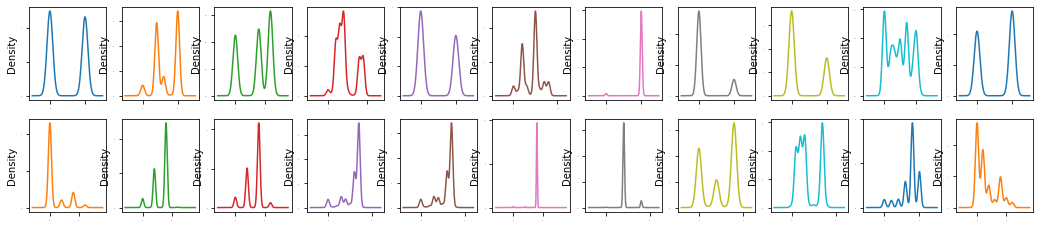

In [29]:
df.plot(kind='density', subplots=True, layout=(6,11),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show

Skewness can be seen in data for few columns, lets check the numeric value and handle the skewness.

In [98]:
#Seperating target variable and the idependent variables.
x=df.drop(columns='class')
y=df[['class']]

In [99]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  1.706938
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [103]:
#Removing skewness
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [104]:
df_new.shape

(8124, 21)

In [105]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  1.286791
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

In [106]:
x=df_new

In [107]:
x.shape

(8124, 21)

In [108]:
y.shape

(8124, 1)

# Lets find the best random state

In [114]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.9799015586546349 on random state 32


We will create our train-test split with random_state 32.

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)

In [116]:
x_train.shape

(5686, 21)

In [117]:
x_test.shape

(2438, 21)

In [118]:
y_train.shape

(5686, 1)

Lets import different ML models and train them.

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [123]:
lr=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [128]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())

accuracy score: LogisticRegression()
0.9799015586546349
[[1233   22]
 [  27 1156]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1255
           1       0.98      0.98      0.98      1183

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Cross Validation Score: 0.8754056839712012
accuracy score: GaussianNB()
0.9159146841673503
[[1222   33]
 [ 172 1011]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1255
           1       0.97      0.85      0.91      1183

    accuracy                           0.92      2438
   macro avg       0.92      0.91      0.92      2438
weighted avg       0.92      0.92      0.92      2438

Cross Validation Score: 0.8027705949223192
accuracy score: RandomForestClassifier()
1.0
[[1255    0]
 [   0 1183]]
              precision    rec

AdaBoost Classifier have the least difference (09) between accuracy and cross validation score.Therefore we will use this model for our data.

# Hyper Parameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
#creating parameter list of AdaBoost Classifier
parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1]}
GCV=GridSearchCV(ada,parameters,cv=5)

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 200, 300]})

In [134]:
#Lets check the best parameters
GCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [136]:
predgcv=GCV.best_estimator_.predict(x_test)

In [137]:
print('Accuracy score :', accuracy_score(y_test,predgcv))

Accuracy score : 0.9991796554552912


In [138]:
#Lets save our model
import joblib
joblib.dump(GCV.best_estimator_,'MushroomAdamodel.obj')

['MushroomAdamodel.obj']